# Learning to Make Predictions on Graphs with Autoencoders.

Setup system paths and modules:

In [1]:
import sys, os

ditk_path = os.path.abspath(os.path.join("../../.."))
if ditk_path not in sys.path:
    sys.path.append(ditk_path)

## Importing modules

In [2]:
from graph.completion.longae.longae import longae
from graph.completion.longae.hparams import hparams as hp

Using TensorFlow backend.


## Evaluation metrics

In [3]:
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import average_precision_score as ap_score

metrics = {
    "auc_score": auc_score,
    "ap_score": ap_score
}

## Creating longae object

In [4]:
graph_completion = longae()

## Test files

In [5]:
data_dir = os.path.join(ditk_path, 'graph/completion/longae/data/')
files_citeseer = list(map(lambda x: os.path.join(data_dir, x), ['citeseer_x.txt', 'citeseer_y.txt', 'citeseer_graph.txt']))
files_cora = list(map(lambda x: os.path.join(data_dir, x), ['cora_x.txt', 'cora_y.txt', 'cora_graph.txt']))

In [6]:
# set hparam file paths
hp.checkpoint_dir = os.path.join(ditk_path, 'graph/completion/longae/checkpoint/')
hp.index_file = os.path.join(ditk_path, 'graph/completion/longae/data/ind.cora.test.index') # or ind.citeseer.test.index

## Read dataset

In [7]:
train_data, validation_data, test_data = graph_completion.read_dataset(files_cora) # or files_citeseer


Compiling autoencoder model...

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/kevinli/school/csci548/project/ditk/graph/completion/longae/longae.py:39: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  test_inds = np.vstack({tuple(row) for row in test_inds})


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 4141)         0                                            
__________________________________________________________________________________________________
encoded1 (Dense)                (None, 256)          1060352     data[0][0]                       
__________________________________________________________________________________________________
encoded2 (Dense)                (None, 128)          32896       encoded1[0][0]                   
__________________________________________________________________________________________________
drop (Dropout)   

## Train model on training data

In [8]:
training_scores = graph_completion.train(train_data, validation_data)


Fitting autoencoder model...


Epoch 1/51
Learning rate: 0.001000
Shuffling data
Instructions for updating:
Use tf.cast instead.
Shuffling data
Avg. training loss: 0.35809228

Evaluating validation set...

Evaluating model
Val AUC: 0.644853
Val AP: 0.676458
Node Val Acc 0.104000

Epoch 2/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.12153044

Evaluating validation set...

Evaluating model
Val AUC: 0.644375
Val AP: 0.671987
Node Val Acc 0.366000

Epoch 3/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.07889261

Evaluating validation set...

Evaluating model
Val AUC: 0.645768
Val AP: 0.674139
Node Val Acc 0.282000

Epoch 4/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.059827387

Evaluating validation set...

Evaluating model
Val AUC: 0.648252
Val AP: 0.679042
Node Val Acc 0.532000

Epoch 5/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.054331623

Evaluating validation set...

Evaluating model
Val AUC: 0.650365
Val AP: 

Shuffling data
Avg. training loss: 0.017878963

Evaluating validation set...

Evaluating model
Val AUC: 0.907612
Val AP: 0.905939
Node Val Acc 0.702000

Epoch 44/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.018374432

Evaluating validation set...

Evaluating model
Val AUC: 0.912302
Val AP: 0.908652
Node Val Acc 0.728000

Epoch 45/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017197078

Evaluating validation set...

Evaluating model
Val AUC: 0.914432
Val AP: 0.909926
Node Val Acc 0.726000

Epoch 46/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.01731066

Evaluating validation set...

Evaluating model
Val AUC: 0.917586
Val AP: 0.912502
Node Val Acc 0.716000

Epoch 47/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017215297

Evaluating validation set...

Evaluating model
Val AUC: 0.917655
Val AP: 0.913442
Node Val Acc 0.718000

Epoch 48/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017482013

Evaluati

## Plot results of training

Text(0.5, 1.0, 'node accuracy')

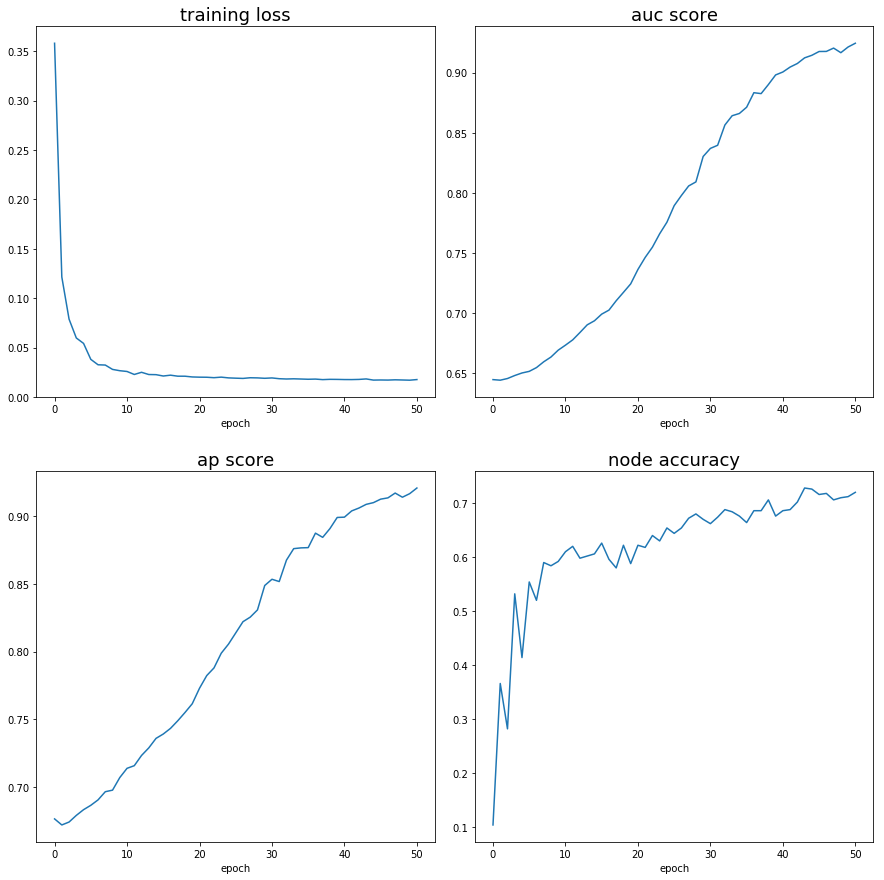

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
ax1.plot(training_scores[0])
ax1.set_xlabel('epoch')
ax1.set_title("training loss", fontsize=18)
ax2.plot(training_scores[1])
ax2.set_xlabel('epoch')
ax2.set_title("auc score", fontsize=18)
ax3.plot(training_scores[2])
ax3.set_xlabel('epoch')
ax3.set_title("ap score", fontsize=18)
ax4.plot(training_scores[3])
ax4.set_xlabel('epoch')
ax4.set_title("node accuracy", fontsize=18)


## Make prediction on testset

In [10]:
prediction_data = graph_completion.predict(test_data)


Evaluating validation set...


## Evaluation predictions

In [11]:
evaluation_results = graph_completion.evaluate(test_data, metrics, prediction_data)
print(evaluation_results)


Evaluating model
Val AUC: 0.924447
Val AP: 0.920722
Node Val Acc 0.742000
{'AUC': 0.924447032898977, 'AP': 0.9207219749229856, 'ACC': 0.742}
